## 1. Build the model

In [53]:
import torch

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv('./data/income1.csv')

In [56]:
data.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


Text(0, 0.5, 'Income')

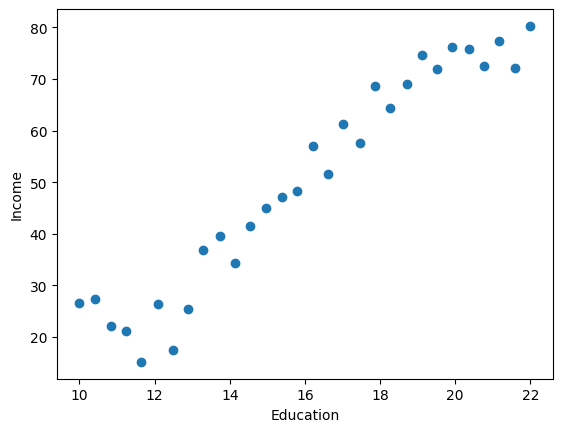

In [57]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')

In [58]:
# create y = wx + b
#initialize weights
w = torch.randn(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [59]:
w.detach().numpy()

array([0.24822491], dtype=float32)

In [60]:
w.data

tensor([0.2482])

In [61]:
#learning rate
ls = 0.001

In [62]:
#create tensor dataset
X = torch.from_numpy(data.Education.values.reshape(-1,1)).type(torch.FloatTensor)
#Reshapes the array into a 2D column vector. 
#The -1 automatically infers the number of rows based on the data’s length.
y = torch.from_numpy(data.Income.values.reshape(-1,1)).type(torch.FloatTensor)

In [63]:
X

tensor([[10.0000],
        [10.4013],
        [10.8428],
        [11.2441],
        [11.6455],
        [12.0870],
        [12.4883],
        [12.8896],
        [13.2910],
        [13.7324],
        [14.1338],
        [14.5351],
        [14.9766],
        [15.3779],
        [15.7793],
        [16.2207],
        [16.6221],
        [17.0234],
        [17.4649],
        [17.8662],
        [18.2676],
        [18.7090],
        [19.1104],
        [19.5117],
        [19.9130],
        [20.3545],
        [20.7559],
        [21.1572],
        [21.5987],
        [22.0000]])

In [64]:
w

tensor([0.2482], requires_grad=True)

In [65]:
b

tensor([0.], requires_grad=True)

In [66]:
y_pred = X * w + b

In [67]:
y_pred

tensor([[2.4822],
        [2.5819],
        [2.6915],
        [2.7911],
        [2.8907],
        [3.0003],
        [3.0999],
        [3.1995],
        [3.2991],
        [3.4087],
        [3.5084],
        [3.6080],
        [3.7176],
        [3.8172],
        [3.9168],
        [4.0264],
        [4.1260],
        [4.2256],
        [4.3352],
        [4.4348],
        [4.5345],
        [4.6440],
        [4.7437],
        [4.8433],
        [4.9429],
        [5.0525],
        [5.1521],
        [5.2517],
        [5.3613],
        [5.4609]], grad_fn=<AddBackward0>)

In [68]:
loss = ((y-y_pred)**2).mean()

In [69]:
loss

tensor(2529.2209, grad_fn=<MeanBackward0>)

In [70]:
loss.backward()

In [71]:
loss

tensor(2529.2209, grad_fn=<MeanBackward0>)

In [75]:
w

tensor([0.2482], requires_grad=True)

In [72]:
w.grad

tensor([-1614.8645])

In [73]:
X.grad

In [74]:
b.grad

tensor([-92.3477])

In [36]:
#define the training process
for epoch in range(5000):
    # in pytorch, the grad will accumulate if you keep differetiate
    if w.grad is not None:
        # w.grad.data.zero_()
        w.grad.zero_()

    if b.grad is not None:
        # b.grad.data.zero_()
        b.grad.zero_()

    y_pred = X * w + b
    loss = ((y-y_pred)**2).mean()

    #backprapagation
    loss.backward()

    #update w,b
    with torch.no_grad():
        w-=w.grad*ls
        b-=b.grad*ls
        # w.data-=w.grad.data*ls
        # b.data-=b.grad.data*ls
    

In [37]:
w

tensor([4.1326], requires_grad=True)

In [38]:
b

tensor([-14.8037], requires_grad=True)

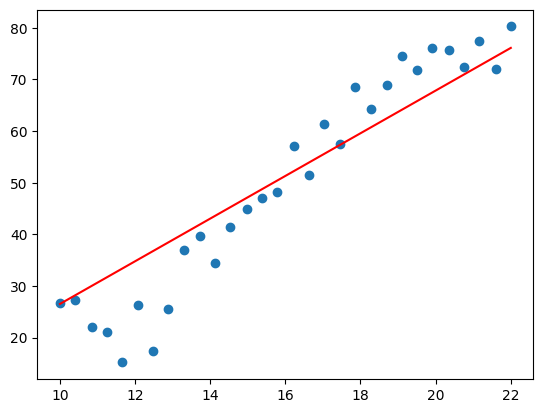

In [39]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), (X*w+b).data.numpy(),c='r')

## 2. Encapsulation

In [152]:
from torch import nn

In [208]:
#linear layer in pytorch
model = nn.Linear(1, 1) #input and output are all 1 dimension

In [154]:
loss_fn = nn.MSELoss() #loss function is mean squared error

In [155]:
model

Linear(in_features=1, out_features=1, bias=True)

In [160]:
opt = torch.optim.SGD(model.parameters(), lr=0.001) #define the optimizer, fist input is the parameters to update

In [228]:
#create tensor dataset
X = torch.from_numpy(data.Education.values.reshape(-1,1)).type(torch.FloatTensor)
#Reshapes the array into a 2D column vector. 
#The -1 automatically infers the number of rows based on the data’s length.
y = torch.from_numpy(data.Income.values.reshape(-1,1)).type(torch.FloatTensor)

In [234]:
X.shape

torch.Size([30, 1])

In [235]:
X

tensor([[10.0000],
        [10.4013],
        [10.8428],
        [11.2441],
        [11.6455],
        [12.0870],
        [12.4883],
        [12.8896],
        [13.2910],
        [13.7324],
        [14.1338],
        [14.5351],
        [14.9766],
        [15.3779],
        [15.7793],
        [16.2207],
        [16.6221],
        [17.0234],
        [17.4649],
        [17.8662],
        [18.2676],
        [18.7090],
        [19.1104],
        [19.5117],
        [19.9130],
        [20.3545],
        [20.7559],
        [21.1572],
        [21.5987],
        [22.0000]])

In [236]:
y.shape

torch.Size([1])

In [239]:
y

tensor([80.2606])

In [237]:
#training
for epoch in range(5000):
    for x, y in zip(X,y):
        x = x.view(1, -1)
        y = y.view(1) 
        y_pred = model(x)
        loss = loss_fn(y,y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()

In [238]:
print(model.weight, model.bias)

Parameter containing:
tensor([[0.1086]], requires_grad=True) Parameter containing:
tensor([-0.6348], requires_grad=True)
